In [1]:
import numpy as np

# widget
%matplotlib inline 

from spin_boson import spin_boson_unitary_6x6, spin_boson_simulation, plot

![theory](theory.png)

# Hamiltonian / Unitary Matrix

$$
\mathcal{H} = \hbar \omega a^{\dagger} a +
\frac{1}{2} (\sigma_z
+ \epsilon \sigma_x )
+
\lambda \sigma_x \ (\sigma^{\dagger} + \sigma) 
$$

In [2]:
unitary = spin_boson_unitary_6x6(dt=0.1, epsilon=1, omega=1, lambd=1)
print(np.round(unitary, 3))

[[ 0.993+0.05j  -0.005+0.j    -0.007+0.001j  0.   -0.05j  -0.005-0.099j
   0.   +0.j   ]
 [-0.005+0.j     0.983-0.048j -0.007+0.001j -0.005-0.099j -0.005-0.049j
  -0.021-0.139j]
 [-0.007+0.001j -0.007+0.001j  0.978-0.148j  0.   +0.j    -0.021-0.139j
  -0.01 -0.048j]
 [ 0.   -0.05j  -0.005-0.099j  0.   +0.j     0.993-0.05j  -0.005+0.j
  -0.007+0.001j]
 [-0.005-0.099j -0.005-0.049j -0.021-0.139j -0.005+0.j     0.973-0.147j
  -0.007+0.001j]
 [ 0.   +0.j    -0.021-0.139j -0.01 -0.048j -0.007+0.001j -0.007+0.001j
   0.958-0.245j]]


# Simulation

In [3]:
# initial state
# spin up (excited), one boson
initial = np.kron(np.array([0, 1]), np.array([0, 1, 0]))

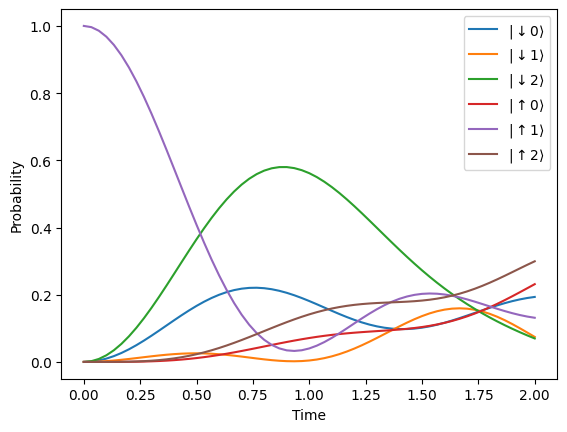

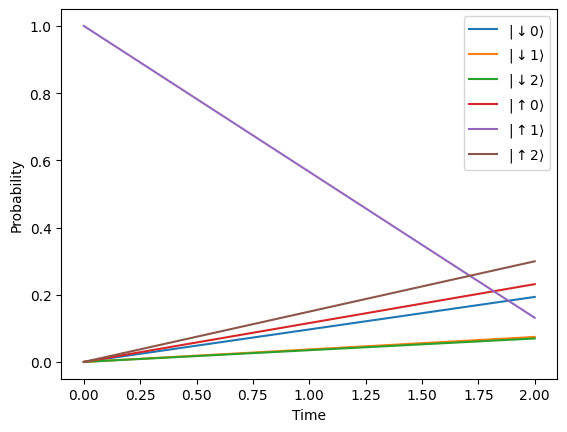

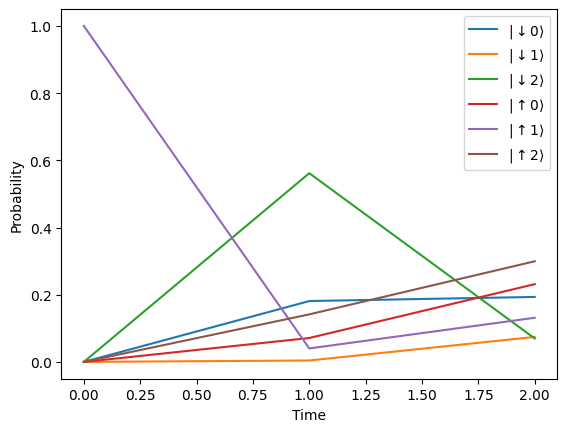

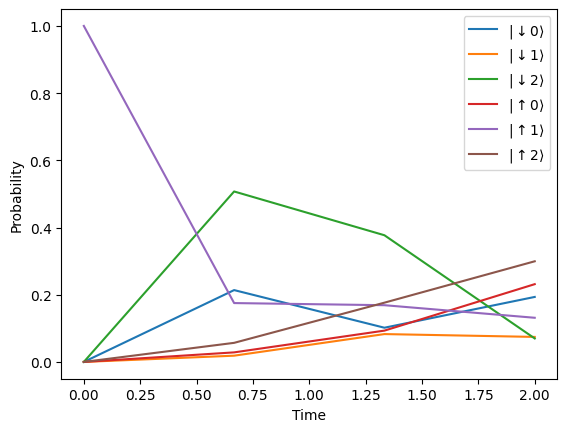

In [4]:
t = 2
params = [1, 1, 1] # epsilon, omega, lambda

timesteps, probabilities = spin_boson_simulation(t, 60, *params, initial)
fig = plot(timesteps, probabilities)

timesteps, probabilities = spin_boson_simulation(t, 1, *params, initial)
fig = plot(timesteps, probabilities)

timesteps, probabilities = spin_boson_simulation(t, 2, *params, initial)
fig = plot(timesteps, probabilities)

timesteps, probabilities = spin_boson_simulation(t, 3, *params, initial)
fig = plot(timesteps, probabilities)

# fig.savefig('test.png')
# fig.show()